In [4]:
import pandas as pd

df = pd.read_csv('./agriculture.csv',index_col=0)

df.head()

,values
year,
1952,100.0
1953,101.6
1954,103.3
1955,111.5
1956,116.5


<Axes: xlabel='year'>

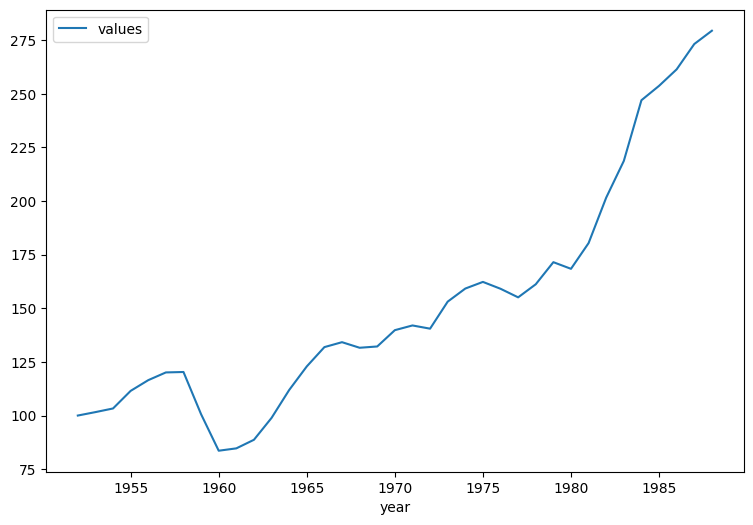

In [5]:
df.plot(figsize=(9, 6))
# 由数据变化趋势可判断数据不是平稳的，接着可以用自相关进行确认

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

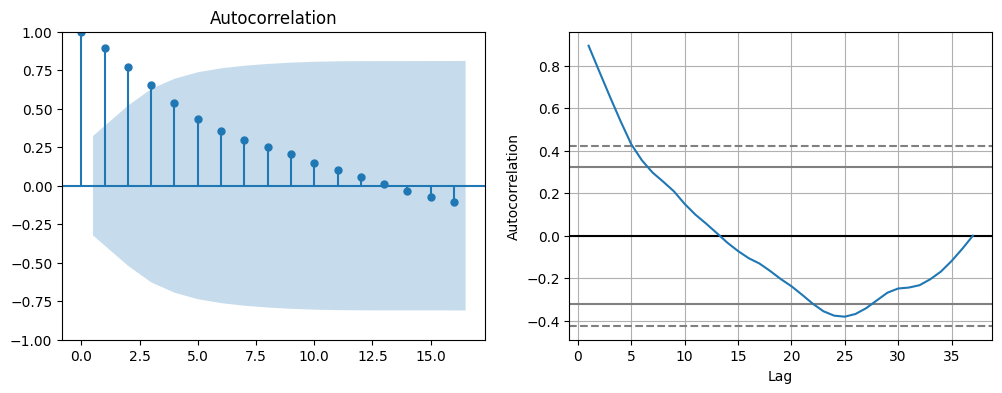

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(df, ax=axes[0])
autocorrelation_plot(df, ax=axes[1])
# 这里可以看到自相关 随着 k 系数不断增加 系数没有一直较小，同时没有很快的衰减到0，所以不符合平稳序列

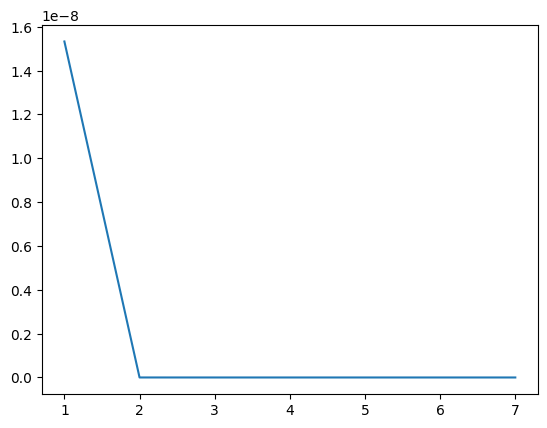

In [9]:
# 因为数据不平稳，其实计算随机性已经没意义了
from statsmodels.stats.diagnostic import acorr_ljungbox

P2 = acorr_ljungbox(df).lb_pvalue
plt.plot(P2)

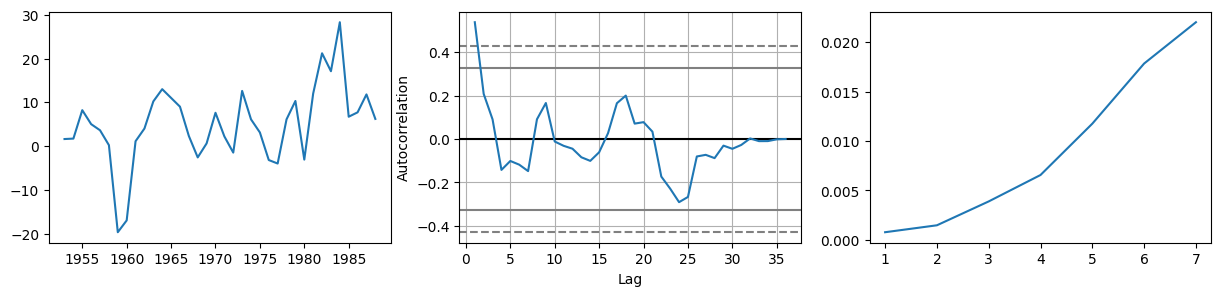

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff1 = df.diff().dropna()  # 1 阶差分

axes[0].plot(diff1)  # 绘图
autocorrelation_plot(diff1, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff1).lb_pvalue)  # 纯随机检验

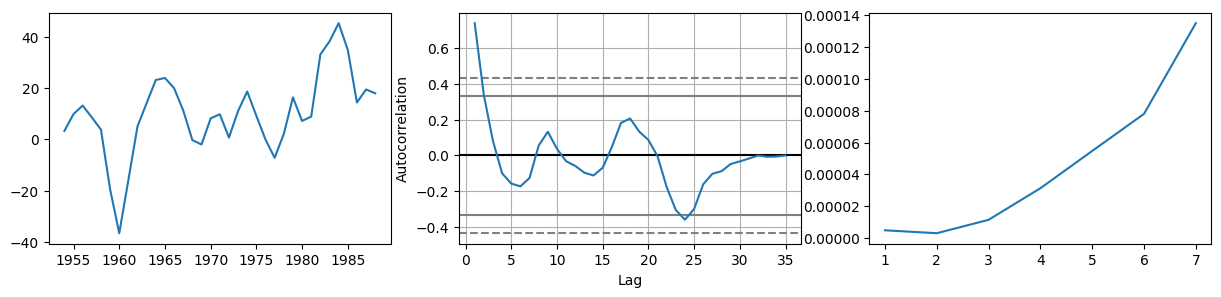

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff1 = df.diff(periods=2).dropna()  # 1 阶 2 步差分

axes[0].plot(diff1)  # 绘图
autocorrelation_plot(diff1, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff1).lb_pvalue)  # 纯随机检验

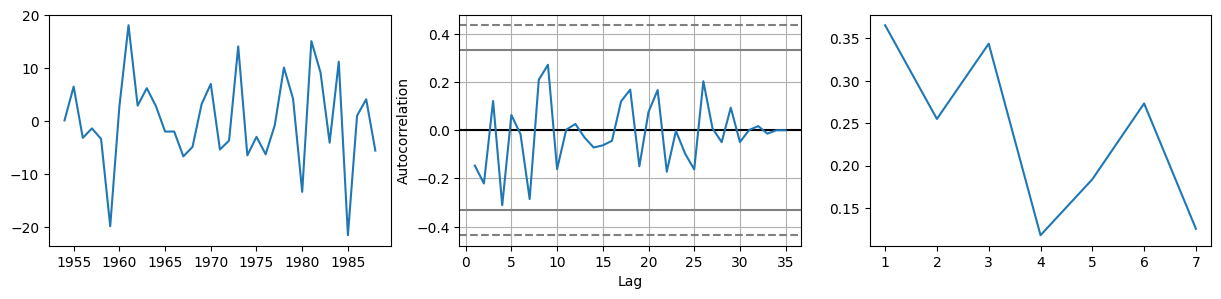

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff2 = df.diff().diff().dropna()  # 2 阶差分

axes[0].plot(diff2)  # 绘图
autocorrelation_plot(diff2, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff2).lb_pvalue)  # 纯随机检验

In [ ]:
# 由上面的差分效果可见，2 阶差分效果更好，且纯随机检验页小于,只要有 lb_pvalue 小于 0.05即可？

In [13]:
from statsmodels.tsa.stattools import arma_order_select_ic


def arima():
    df = pd.read_csv("agriculture.csv", index_col=0)
    # 1 阶差分
    diff = df.diff().dropna()
    # AIC 计算 p、q
    p, q = arma_order_select_ic(diff, ic='aic')['aic_min_order'] 
    d = 1
    return p, d, q

arima()

C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91658\Miniconda3\envs\ml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 1, 1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train_data, order=(0, 1, -1)).fit()  # 定义并训练模型
plt.plot(arima.forecast(steps=40).values, ".-", label="predict")  # 输出后续 40 个预测结果
plt.plot(test_data.values, ".-", label="real")
plt.legend()